# California Housing Prediction Project

##### By Brandon Kluzek

# 1. Introduction

## 1.1 Problem Statement

In the rapidly evolving real estate market, accurately predicting house prices is essential for both buyers and sellers to make informed decisions. The challenge lies in understanding the various factors that influence house values and effectively modeling these relationships to forecast prices. This project aims to tackle this challenge by applying data science and machine learning techniques to predict median house values in California.

The dataset used in this study contains detailed information about different housing attributes, such as median income, housing median age, total rooms, bedrooms, population, households, and proximity to the ocean. By analyzing and modeling these features, this project seeks to provide insights into the key factors driving house prices and develop a robust predictive model. The results will not only aid potential buyers and sellers but also offer valuable insights for real estate analysts and investors.

Through this project, we will navigate the entire data science pipeline: from data preprocessing, exploratory data analysis, and feature engineering, to model building, evaluation, and interpretation. The goal is to create a comprehensive and accessible analysis that can serve as a valuable resource for understanding and predicting housing market trends.

## 1.2 Context

The 1990 California Housing Dataset, derived from the 1990 California census, offers a comprehensive view of the housing landscape in California districts during that period. It encompasses a dataset of 20,640 instances, focusing on various housing-related attributes. The dataset is structured as a data frame, with each row providing aggregated data about a specific district.

Key attributes in the dataset include:
- **Longitude and Latitude:** These columns represent the geographical coordinates of the district.
- **Housing Median Age:** This indicates the median age of the houses in a district.
- **Total Rooms and Total Bedrooms:** These columns provide counts of the total number of rooms and bedrooms in all houses of a district.
- **Population:** The total population of the district.
- **Households:** The number of households in the district.
- **Median Income:** This is the median income of people in the district, noted in tens of thousands.
- **Median House Value:** The median value of houses in the district.
- **Ocean Proximity:** This denotes the district's distance from the ocean.

This dataset is particularly notable for its granularity at the district level, covering aspects such as demography (income, population, household occupancy), location (latitude, longitude), and general housing information (average rooms, bedrooms, and house age). The data does not contain individual names or identifiers, ensuring privacy.

One of the highlights of this dataset is its role in providing insights into various aspects of housing in California districts, including demographic trends, economic conditions, and spatial distribution patterns. It serves as a valuable resource for understanding the housing scenario in California during the early 1990s, and its structured format makes it a suitable choice for machine learning and data analysis exercises.

# 2. Data Preparation and Exploratory Data Analysis

## 2.1 Loading in Data and Basic Exploration

To start I am going to load in the data and take a basic look at it.

In [1]:
import pandas as pd

# load the dataset
df= pd.read_csv(r"C:\Users\Brandon Kluzek\Downloads\housing.csv\housing.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


To begin, the first aspect I'll address is the `ocean_proximity` variable. Unlike the other variables in the dataset, which are of data type `float64`, `ocean_proximity` is classified as an `object`. This distinction is crucial as it implies that `ocean_proximity` is categorical in nature, rather than numerical like the rest. Handling categorical variables requires different preprocessing steps compared to numerical ones. For instance, I might consider encoding techniques like one-hot encoding or label encoding to convert this variable into a format suitable for machine learning models. This step will be essential in incorporating `ocean_proximity` effectively into our analysis and ensuring that its categorical nature is appropriately accounted for.

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Assuming df is your DataFrame and 'ocean_proximity' is the column of interest
unique_ocean_proximity = df['ocean_proximity'].unique()

# Printing the unique values
print(unique_ocean_proximity)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


The `ocean_proximity` variable in our dataset contains distinct categories like `NEAR BAY`, `<1H OCEAN}`, `INLAND`, `NEAR OCEAN`, and `ISLAND`, representing various geographical locations relative to the ocean. Given their categorical and non-numeric nature, the next step in our analysis is to apply one-hot encoding to these categories. This process will convert each category into a separate boolean variable, thereby transforming the data into a format that is more suitable for machine learning models. After encoding, we'll also standardize the column names by replacing spaces and special characters. This preparation is essential for ensuring that the geographical proximity information is effectively integrated into our predictive models, allowing for a more nuanced understanding of how ocean proximity influences housing values.

In [5]:
# One-hot encoding the 'ocean_proximity' column
df = pd.get_dummies(df, columns=['ocean_proximity'])
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns = df.columns.str.replace('<', 'less_than_').str.lower()

# Check if this has worked successfully
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_less_than_1h_ocean,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


Having effectively encoded the `ocean_proximity` variable, I will next turn my attention to univariate analysis. This crucial preliminary step involves examining each variable individually to understand its distribution, identify potential outliers, and spot any anomalies. Univariate analysis is particularly important as it lays the groundwork for informed decision-making regarding null values. By thoroughly understanding each variable's characteristics and patterns, I can develop a more strategic approach to handling nulls—whether through imputation, removal, or other methods. This step ensures that any actions taken to address null values are based on a comprehensive understanding of the data, thereby preserving the dataset's integrity and enhancing the accuracy of subsequent modeling efforts.

## 2.2 Univariate Analysis

In the univariate analysis of our dataset, we'll examine each variable independently to understand its distribution, central tendencies, and variability. This analysis starts with generating descriptive statistics, providing key insights such as mean, median, and standard deviation. Following this, we'll employ histograms to visually explore the distribution of each variable. These histograms are crucial in revealing distribution shapes, identifying skewness, and spotting any anomalies or outliers. This step is essential for guiding our data preprocessing and ensuring that our dataset is aptly prepared for effective modeling.

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


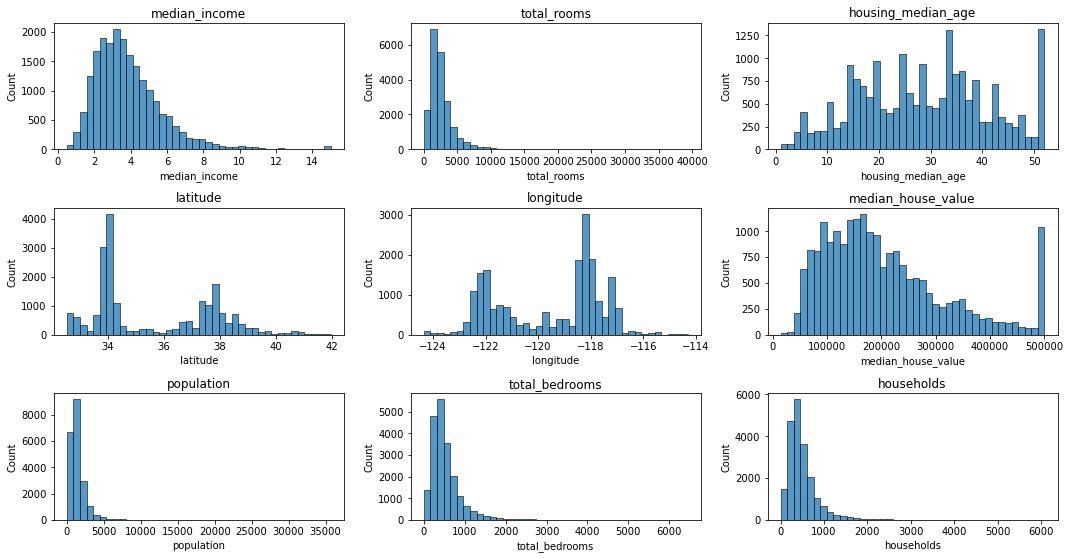

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame

# Specify the columns for the histograms
columns_to_plot = ['median_income', 'total_rooms', 'housing_median_age', 
                   'latitude', 'longitude', 'median_house_value', 
                   'population', 'total_bedrooms', 'households']

# Determine the number of rows and columns for the subplot grid
num_vars = len(columns_to_plot)
num_rows = int(num_vars ** 0.5) + 1
num_cols = (num_vars // num_rows) + (num_vars % num_rows > 0)

# Create a figure and a grid of subplots
plt.figure(figsize=(15, 10))

for i, var in enumerate(columns_to_plot, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[var], kde=False, bins=40)
    plt.title(var)

plt.tight_layout()
plt.show()

I will now break down the univariate analysis, focusing on three potential issues in the data that require attention before proceeding with model training.

1. **Ceilings on Housing Median Age and Median House Value**:
    The most crucial aspect of the analysis involves decisions with no clear beneficial outcomes. The presence of upper-limit ceilings, although unexplained, is evident from the histograms. The ceiling for Housing Median Age could be attributed to historical record limitations, although this remains unconfirmed. As an independent variable, its implications are minimal. However, the ceiling on Median House Value, our dependent variable, presents several issues:

    - During training, regression models may face difficulties due to the loss of linearity and uniformity, potentially diminishing accuracy. Even models tolerant of non-linearity might seem less accurate because of inflated error metrics.
    
    - Post-training, predictions for Median House Value above the ceiling could be underestimated—a form of extrapolation best avoided. The plausible outputs may not reflect the overlying issue, as they lie within acceptable input ranges.

    This leads to two options:

    - (A) Omit rows with ceiling values for either or both variables.
    
    - (B) Retain the data as is.

    The main trade-off is the loss of a significant subset of data, which could otherwise enhance the model's predictive reliability. Despite the potential benefit to extrapolation capabilities, it is essential to discern whether new data inputs correspond to this subset. My approach, therefore, is to choose option (A), removing ceiling values to train a primary model. Additionally, a secondary model will classify whether inputs belong to this subset. This dual-model strategy mitigates concerns of uninformed extrapolation and aids in identifying higher Median House Values, pending new information to guide otherwise.
    
    
2. **Right-Tail Skewness in Five Variables**:
    The variables—`median_income`, `total_rooms`, `population`, `total_bedrooms`, `households`—raise concerns due to their skewness. Firstly, conventional outlier detection methods might flag the tail ends as outliers. While this isn't critical, as alternative methods exist, it necessitates caution with z-scores and IQR methodologies. The more pressing matter is considering variable transformations during feature engineering to achieve a more normal distribution. Though not always necessary, it's important to note when employing standard normalization and standardization, particularly if a regression model is under consideration.
 
 
3. **Bimodal Distribution of Longitude and Latitude**:
    The bimodal distributions of these variables are understandable, as housing is typically radially distributed around key commercial or transportation hubs. Housing value often increases closer to these loci—for instance, downtown or major metropolitan areas command higher prices, which taper off towards the suburbs and rural areas. This suggests linear interpretations of these variables may be ineffective. An alternative could involve determining the centers of these distributions and creating a new variable using circle or ellipse equations:

   - For a circle:

   $$
   (\text{longitude} - c_{\text{long}})^2 + (\text{latitude} - c_{\text{lat}})^2 = r^2
   $$

   - For an ellipse:

   $$
   \frac{(\text{longitude} - c_{\text{long}})^2}{a^2} + \frac{(\text{latitude} - c_{\text{lat}})^2}{b^2} = 1
   $$

    Avoiding regression models may be simpler. A broken-model approach can lead to noise in predictions due to distance metrics affecting other groups. I would generally advise against creating two separate models, to avoid introducing new complexities. Furthermore, the assumption that Median Housing Value varies smoothly with radial distance is tenuous, without considering spikes or smaller clusters. Before adopting this approach, the model's increased complexity—for identifying centers, determining constants for distance scaling, and accommodating potential skewing of the ellipse—must be carefully considered.

In [8]:
# We will detect the ceiling values as the most frequent values at the upper end of the distribution.
def detect_ceiling_values(df, column_name):
    # Find the value that is most common at the upper end of the distribution for the column
    ceiling_value = df[column_name].value_counts().idxmax()
    return ceiling_value

# Assuming the 'df' DataFrame is already loaded with your data
# Let's proceed with detecting ceiling values and calculating percentages

# Detect ceiling values for 'housing_median_age' and 'median_house_value'
age_ceiling = detect_ceiling_values(df, 'housing_median_age')
value_ceiling = detect_ceiling_values(df, 'median_house_value')

# Get the indices of rows with ceiling values for each variable
age_ceiling_indices = set(df[df['housing_median_age'] == age_ceiling].index)
value_ceiling_indices = set(df[df['median_house_value'] == value_ceiling].index)

# Calculate the intersection and union of the two sets of indices
shared_indices = age_ceiling_indices.intersection(value_ceiling_indices)
total_combined_indices = age_ceiling_indices.union(value_ceiling_indices)

# Calculate the total number of rows in the dataset
total_rows = df.shape[0]

# Count the number of rows for each case and calculate percentages
num_shared_rows = len(shared_indices)
num_total_combined = len(total_combined_indices)
shared_percentage = (num_shared_rows / total_rows) * 100
total_combined_percentage = (num_total_combined / total_rows) * 100

# Print out the detected ceilings and the number of rows affected, including percentages
print(f"Detected ceiling for 'housing_median_age': {age_ceiling}, number of rows: {len(age_ceiling_indices)} ({len(age_ceiling_indices)/total_rows*100:.2f}%)")
print(f"Detected ceiling for 'median_house_value': {value_ceiling}, number of rows: {len(value_ceiling_indices)} ({len(value_ceiling_indices)/total_rows*100:.2f}%)")
print(f"Number of rows with both ceilings: {num_shared_rows} ({shared_percentage:.2f}%)")
print(f"Total number of unique rows with either ceiling: {num_total_combined} ({total_combined_percentage:.2f}%)")

Detected ceiling for 'housing_median_age': 52.0, number of rows: 1273 (6.17%)
Detected ceiling for 'median_house_value': 500001.0, number of rows: 965 (4.68%)
Number of rows with both ceilings: 170 (0.82%)
Total number of unique rows with either ceiling: 2068 (10.02%)


After careful analysis, the decision to drop approximately $10\%$ of the dataset is deemed necessary, despite its substantial size. This step, motivated by the detection of ceiling values in `housing_median_age` and `median_house_value`—affecting $6.17\%$ and $4.68\%$ of the rows respectively—aims to enhance the dataset's quality and accuracy. By removing these specific data points, we not only address the skewness introduced by the ceilings but also effectively manage potential outliers. Outliers can significantly impact statistical models, especially those predicated on the assumption of normality. Thus, eliminating these ceiling-induced outliers is a strategic move to ensure more robust and accurate model training. Despite the considerable size of the data removal, the integrity and representativeness of the remaining dataset is prioritized, setting the stage for reliable and valid predictive modeling in subsequent stages.

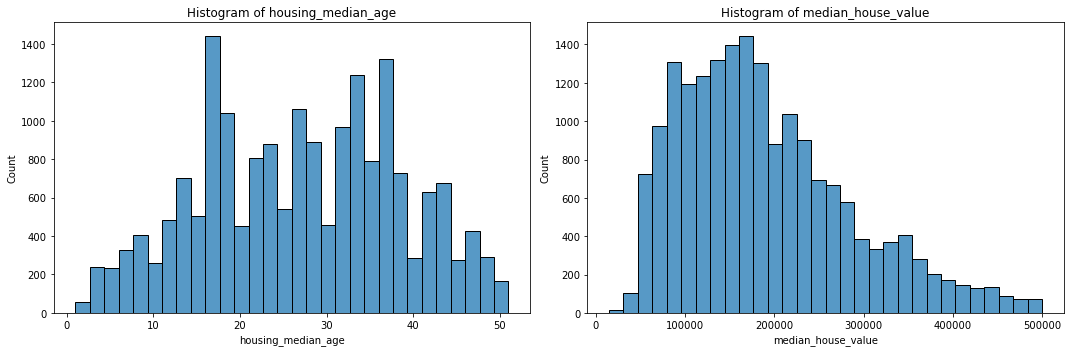

In [9]:
# Drop rows where 'housing_median_age' and 'median_house_value' are at their ceiling values
df = df[(df['housing_median_age'] != age_ceiling) & (df['median_house_value'] != value_ceiling)]

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Specify the columns for the histograms of the variables we trimmed
columns_to_plot = ['housing_median_age', 'median_house_value']

# Create a figure and a grid of subplots
plt.figure(figsize=(15, 5))  # Adjusting the size for just two subplots

for i, var in enumerate(columns_to_plot):
    plt.subplot(1, 2, i+1)  # We have only one row of plots and two columns
    sns.histplot(df[var], kde=False, bins=30)
    plt.title(f'Histogram of {var}')

plt.tight_layout()
plt.show()

The removal of the ceiling values from our dataset has been successfully accomplished, resulting in a noticeable improvement in the histograms. This enhancement in the data visualization confirms that the distribution of key variables is now more representative and less skewed, paving the way for more accurate and reliable analyses in subsequent stages of our study.

## 2.3 Bivariate Analysis

Embarking now on the bivariate analysis, we shift our focus to exploring relationships between pairs of variables within our dataset. Bivariate analysis is a crucial step, as it helps us to uncover potential associations, trends, and dependencies between variables. Understanding these relationships is essential for model building, as it informs us about how variables interact with each other and which ones might have a significant impact on our dependent variable.

To commence this phase, we'll construct a correlation matrix. This matrix is a powerful tool for quickly visualizing and quantifying the degree of correlation between pairs of variables. In the context of our analysis, the correlation matrix serves dual purposes:

1. **Identifying Relationships Among Independent Variables**: It helps us to detect any strong correlations among the independent variables. Strong correlations between these variables, known as multicollinearity, can pose challenges in certain types of statistical models, particularly regression-based ones. Identifying and addressing multicollinearity is crucial to ensure the accuracy and reliability of our model predictions.

2. **Assessing Correlations with the Dependent Variable**: The matrix will also provide insights into how each independent variable is correlated with the dependent variable. This early look at potential predictors can be invaluable in guiding our feature selection and model development process. It helps us to pinpoint which variables might be most influential in predicting the outcome and therefore deserve closer examination in further analyses.

Overall, the bivariate analysis, starting with the correlation matrix, is an essential step towards building a robust analytical framework. It sets the stage for more detailed investigations into the relationships between variables and helps in crafting a more informed, data-driven approach to our modeling strategy.

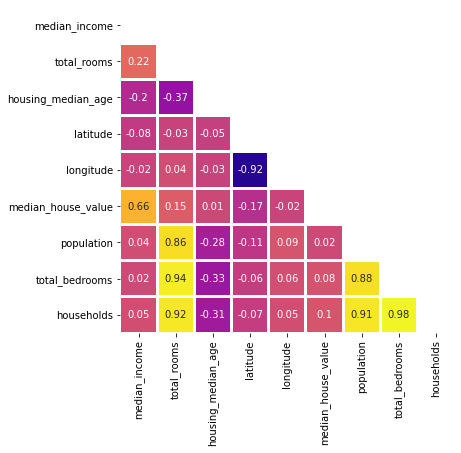

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'df' is your DataFrame

# Specify the columns for the correlation matrix
columns_to_plot = ['median_income', 'total_rooms', 'housing_median_age', 
                   'latitude', 'longitude', 'median_house_value', 
                   'population', 'total_bedrooms', 'households']

# Function to plot the correlation matrix for the specified columns
def corrMat(df, columns):
    corr_mat = df[columns].corr().round(2)
    f, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corr_mat, dtype=np.bool_)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat, mask=mask, vmin=-1, vmax=1, center=0, 
                cmap='plasma', square=False, lw=2, annot=True, cbar=False)
    plt.show()

# Call the function with your DataFrame and specified columns
corrMat(df, columns_to_plot)

The correlation matrix provides a compelling visual cue of the interdependencies among the variables in our dataset. It highlights that `households` and `total_bedrooms` have an exceptionally high correlation coefficient of $r=0.98$, suggesting a near-linear relationship between these two variables. This strong interconnection raises concerns about multicollinearity, which could influence the performance of certain models, particularly those that assume feature independence like linear regression.

Furthermore, `households` shows significant correlations, approximately $r=0.9$, with three other variables, underscoring the potential for redundant information within our predictors. `Total_rooms` also shares a high correlation with two variables, one of which is `households`, again flagging a potential multicollinearity issue. These findings will be critical when we approach the feature engineering stage, where we might consider dropping one or more of these highly interrelated variables to simplify the model and potentially enhance its performance.

Notably, the variable `median_income` is observed to have a strong positive correlation with the dependent variable `median_house_value`, which could signify its importance as a predictor in our subsequent modeling efforts.

Moving forward, the next step in our bivariate analysis is to construct a series of scatter plots complemented by density heatmaps. These plots will serve to further elucidate the relationships between pairs of variables, offering a nuanced understanding of their distribution and interaction patterns, and will ultimately inform our decisions regarding feature selection and model architecture.

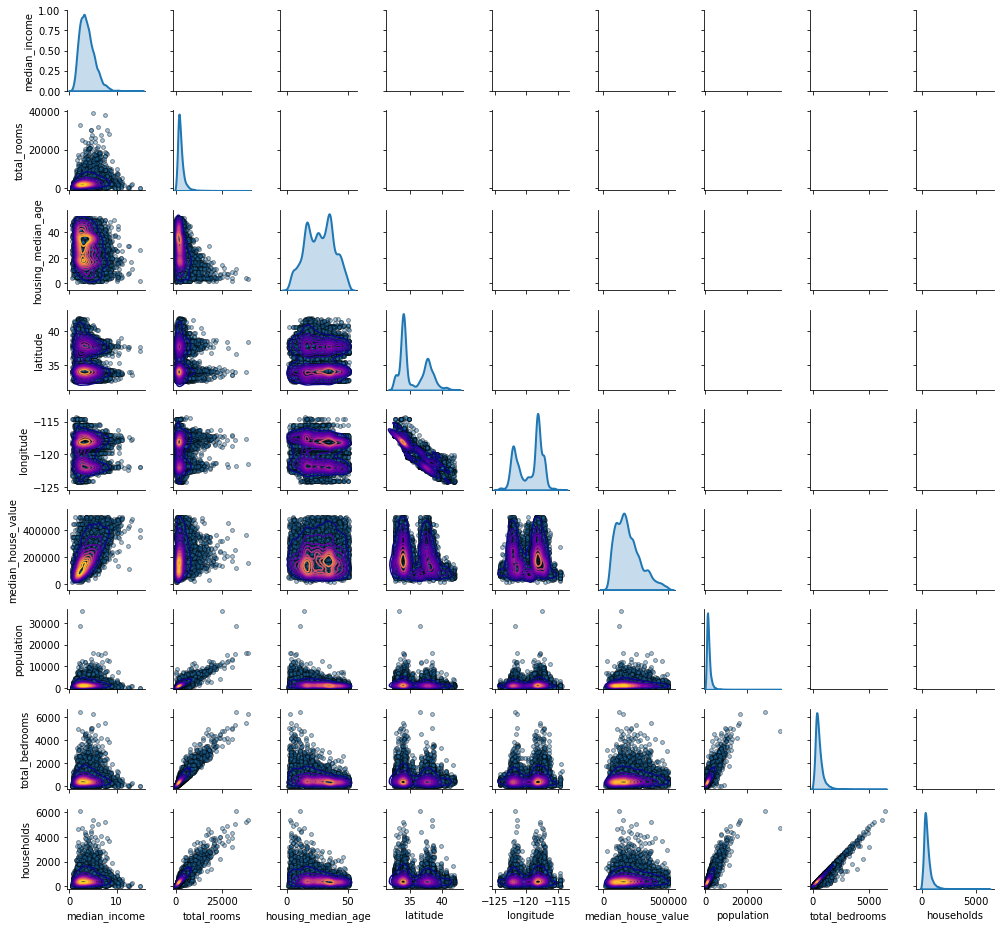

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the columns to include in the PairGrid
columns_to_plot = ['median_income', 'total_rooms', 'housing_median_age', 
                   'latitude', 'longitude','median_house_value', 'population', 
                   'total_bedrooms', 'households']

def snsPairGrid(df):
    ''' Plots a Seaborn Pairgrid w/ KDE & scatter plot of df features'''
    g = sns.PairGrid(df, diag_sharey=False)
    g.fig.set_size_inches(14, 13)

    # KDE plot on the diagonal
    g.map_diag(sns.kdeplot, lw=2, fill=True)

    # Scatter plot on the lower triangle
    g.map_lower(sns.scatterplot, s=15, edgecolor="k", linewidth=1, alpha=0.4)

    # KDE approximation on the lower half
    g.map_lower(sns.kdeplot, cmap='plasma', n_levels=10)

    plt.tight_layout()

# Apply the custom PairGrid function to your selected columns
snsPairGrid(df[columns_to_plot])

The bivariate scatter plots underscore several key findings. Foremost among these is the bimodal distribution apparent in the `longitude` and `latitude` variables, echoing our previous univariate insights and indicative of the geographic clustering of property values around major urban centers or natural features. This bimodal nature reinforces the need for careful consideration when modeling, as standard linear interpretations may fall short.

In the plots, we also observe a pronounced linear trend between `households` and `total_rooms`, which is consistent with the high correlation coefficient seen in our correlation matrix. The visualization confirms that these variables move in tandem, suggesting that one could potentially predict the other with a high degree of accuracy. This redundancy, known as multicollinearity, poses significant challenges for regression models, which assume independence between predictors. If regression techniques are to be utilized, reducing complexity by eliminating one, if not both, of these interlinked variables might be necessary.

However, if the modeling strategy pivots towards more robust techniques like XGBoost, which can handle multicollinear features to a certain extent, the decision to remove these variables becomes less clear-cut. Despite this, the principle of parsimony suggests that simplifying the model by removing the `households` variable might be beneficial, especially given its strong correlation with `total_bedrooms`.

Another aspect that stands out is the presence of outliers across several variables, clearly detached from the main clusters of data points. These outliers, if not addressed, could skew the model's performance by exerting undue influence on the fit. Therefore, appropriate outlier detection and removal will be a crucial step before proceeding with the model training to ensure robustness and generalizability.

In summary, the bivariate analysis provides actionable insights into the relationships between variables, guiding the feature engineering process and informing the choice of modeling techniques. It also highlights the geographic nuances of housing prices and the importance of outlier management, setting the stage for a more targeted and effective modeling approach.

## 2.4 Handling Null Values

Before delving into treatment strategies for missing data, it's essential to visualize the distribution and extent of null values within the dataset. A heatmap serves as an effective tool for this initial exploration, providing a clear visual representation of the missing data's spread across different variables.

Creating a heatmap will help us assess:

- **The Extent of Missing Data**: It visually quantifies the nulls, revealing the scale of the missing data issue and helping determine whether it's widespread or localized to specific variables.
- **Patterns in Missing Data**: By mapping out the nulls, we can identify if they are randomly distributed or if there's a pattern, which might suggest a relationship between the missingness and other variables or indices.
- **Variable Relationships**: The heatmap can indicate if the missingness in one variable correlates with another, hinting at underlying relationships that may need to be addressed during imputation or feature engineering.

The insights gained from the heatmap will inform the choice of imputation techniques, such as mean substitution, k-nearest neighbors, or more complex model-based methods. The chosen method will depend on the pattern and amount of missing data, as well as the nature of the variables involved. It's a crucial step to ensure that the data used for model training is as complete and robust as possible, which will, in turn, improve the model's accuracy and reliability.

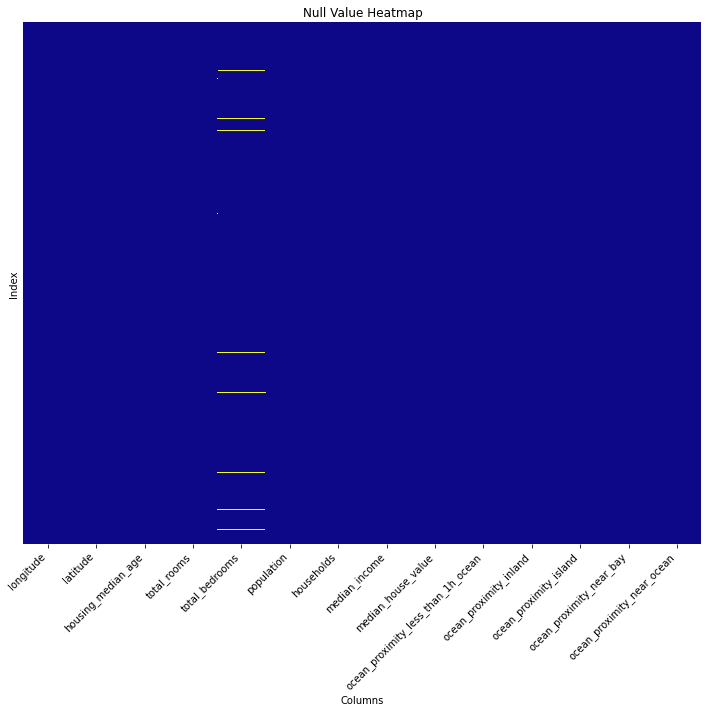

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(10, 10))  # You can adjust the figure size as needed

# Create a heatmap, without a color bar, using a color mapping that has a clear contrast
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='plasma')

# Rotate the x-axis labels for better readability if there are many columns
plt.xticks(rotation=45, ha='right')  # 'ha' aligns the rotation relative to the right (angle)

# Add title and labels
plt.title('Null Value Heatmap')
plt.xlabel('Columns')
plt.ylabel('Index')

# Display the plot
plt.tight_layout()  # Adjust the layout to fit everything nicely
plt.show()

Upon inspecting the heatmap for null values, it's clear that the `total_bedrooms` attribute is the sole column affected by missing data. The prevalence of null values is modest, but the potential correlation between these missing values and the `median_house_value`—our outcome of interest—warrants careful consideration. 

To ascertain whether the null values are randomly missing or if they hold any bias towards the `median_house_value`, I'll commence with a visual exploration. Should any patterns emerge suggesting a relationship, a more rigorous statistical test will be employed to validate the findings. This analysis is not only foundational in determining the approach for handling nulls but also pivotal for maintaining the integrity of the model's predictive performance. 

Determining the percentage of the dataset impacted by missing values is vital. It helps decide the extent to which data imputation or exclusion might skew our dataset and influence the model's outcomes. An informed approach to addressing these null values will ensure robust data preparation, setting the stage for effective model training.

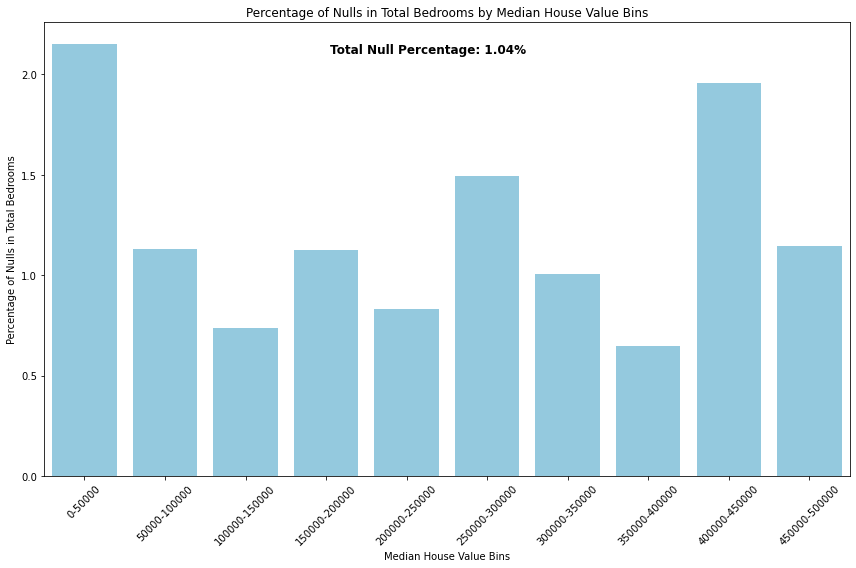

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


# Create a DataFrame for null analysis to avoid modifying the original one
df_null_analysis = df.copy()

# Define bins for 'median_house_value' starting at 0 and with a step of 50000
min_value = 0
max_value = df_null_analysis['median_house_value'].max()
step = 50000
bin_edges = np.arange(min_value, max_value + step, step)
bin_labels = [f'{int(edge)}-{int(edge + step)}' for edge in bin_edges[:-1]]
df_null_analysis['value_bin'] = pd.cut(df_null_analysis['median_house_value'], bins=bin_edges, labels=bin_labels, right=False)

# Calculate the percentage of nulls in 'total_bedrooms' for each bin
null_percentage = df_null_analysis.groupby('value_bin')['total_bedrooms'].apply(lambda x: x.isnull().mean() * 100)

# Create a new DataFrame for plotting to avoid the conversion error
plot_data = pd.DataFrame({
    'Median House Value Bins': null_percentage.index.astype(str),
    'Percentage of Nulls': null_percentage.values
})

# Calculate the total percentage of nulls in 'total_bedrooms' across the whole dataset
total_null_percentage = df_null_analysis['total_bedrooms'].isnull().mean() * 100

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Median House Value Bins', y='Percentage of Nulls', data=plot_data, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Median House Value Bins')
plt.ylabel('Percentage of Nulls in Total Bedrooms')

# Placing the total null percentage text further down to avoid overlap
plt.title('Percentage of Nulls in Total Bedrooms by Median House Value Bins')
plt.figtext(0.5, 0.9, f'Total Null Percentage: {total_null_percentage:.2f}%', ha="center", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

The analysis of missing values in `total_bedrooms` reveals that the overall null percentage is relatively minor at $1.04\%$. This low incidence suggests that we might have the option to remove these data points without substantially affecting our model's performance. However, a closer examination shows a higher concentration of nulls in the lower bin of the median house values. This pattern prompts further investigation to determine if these missing values are representative of a specific segment of our data.

Before deciding to drop these points, it's prudent to assess whether there's a statistically significant association between the presence of null values and `median_house_value`. I plan to employ Receiver Operating Characteristic (ROC) and Area Under the Curve (AUC) scores to gauge the strength of any predictive relationship between the missing values and the observed `median_house_value`. An AUC score significantly different from $0.5$—the score for random guessing—would indicate that the missingness of `total_bedrooms` is not occurring at random and may warrant imputation rather than deletion.

In [14]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load the data into DataFrame df
# df = pd.read_csv("path_to_your_data.csv")

# Create a binary indicator variable for missingness of 'total_bedrooms' in a separate Series
bedrooms_missing = df['total_bedrooms'].isnull().astype(int)

# Select other observed variables to use as predictors (excluding 'total_bedrooms')
# Ensure to exclude any other columns with missing values or non-numeric columns
predictor_columns = [col for col in df.columns if col not in ['total_bedrooms', 'ocean_proximity']]
X = df[predictor_columns]
y = bedrooms_missing

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict the probability of missingness in the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate the AUC score as a measure of how well missingness is predicted by observed values
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc_score}")

AUC Score: 0.4261944802270135


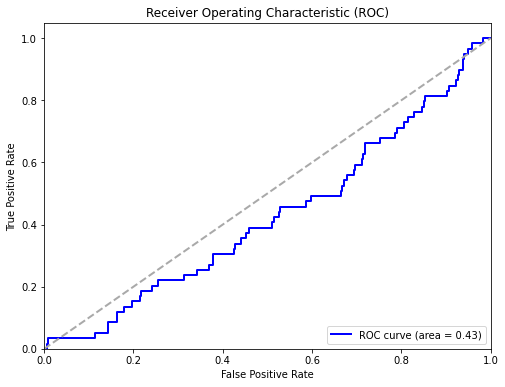

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkgrey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

The ideal score $AUC=0.5$, which signifies a completely random classification. With the calculated score being approximately $AUC=0.43$, my concerns about a potential relationship between the missing values and the observed values are minimal. Further, the ROC curve did not raise any issues regarding the AUC score. Therefore, I believe it is reasonable to drop data points containing null values.

For the sake of thoroughness, I will explore the possibility of using a KNN imputer to estimate the missing values in the `total_bedrooms` feature. Should the data points with null values prove significant, I believe this is the best course of action. Other imputation methods I considered were using 0 or the maximum value, which could lead to over- or underestimation, and using the mean or median, which are central tendency measures.

### KNN Imputation
KNN imputation replaces missing values using the k-nearest neighbors approach. The imputed value is calculated as the average of the nearest neighbors' values.

The Euclidean distance between two points $X_i$ and $X_j$ with features $x$ is given by the equation:

$$
d(X_i, X_j) = \sqrt{\sum_{x=1}^{n} (X_{i,x} - X_{j,x})^2}
$$

The imputed value for a missing attribute is then computed as the mean of the k-nearest neighbors:

$$
\text{Imputed Value} = \frac{1}{k} \sum_{i=1}^{k} X_{\text{nearest},i}
$$

To determine the effectiveness of the KNN imputation, I will compare the Root Mean Squared Error (RMSE) of the imputed values against the actual values. The RMSE is calculated as:

$$
\text{RMSE} = \sqrt{\frac{1}{m} \sum_{i=1}^{m} (\text{Original}_i - \text{Imputed}_i)^2}
$$

Where \( m \) is the number of instances that had missing values imputed.


In [16]:
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
import pandas as pd


# Creating a DataFrame for testing imputation
df_impute_test = df[df['total_bedrooms'].notnull()].copy()

# Function to perform KNN imputation and calculate RMSE
def knn_impute_and_evaluate(df, k, mask):
    # Apply KNN imputation
    imputer = KNNImputer(n_neighbors=k)
    numeric_df = df.select_dtypes(include=[np.number])
    df_imputed = imputer.fit_transform(numeric_df)
    
    # Convert imputed data back to DataFrame
    df_imputed = pd.DataFrame(df_imputed, columns=numeric_df.columns, index=numeric_df.index)
    
    # Extract imputed values
    imputed_values = df_imputed.loc[mask, 'total_bedrooms']
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(original_values, imputed_values))
    return rmse

# Mask a subset of 'total_bedrooms'
np.random.seed(0)
mask = np.random.rand(len(df_impute_test)) < 0.1
original_values = df_impute_test.loc[mask, 'total_bedrooms'].copy()
df_impute_test.loc[mask, 'total_bedrooms'] = np.nan

# Iterate over a range of k values and evaluate RMSE
k_values = range(1, 10)  # Adjust the range as needed
rmse_results = {}

for k in k_values:
    rmse = knn_impute_and_evaluate(df_impute_test, k, mask)
    rmse_results[k] = rmse
    print(f"RMSE for k={k}: {rmse}")

# Find the best k
best_k = min(rmse_results, key=rmse_results.get)
print(f"Best k: {best_k} with RMSE: {rmse_results[best_k]}")

# Calculate range and standard deviation of 'total_bedrooms'
total_bedrooms_range = df['total_bedrooms'].max() - df['total_bedrooms'].min()
total_bedrooms_std = df['total_bedrooms'].std()

# Calculating RMSE to Range Ratio and RMSE to Standard Deviation Ratio
rmse_to_range_ratio = rmse / total_bedrooms_range
rmse_to_std_ratio = rmse / total_bedrooms_std

# Print the results
print(f"RMSE of KNN imputation: {rmse}")
print(f"Range of 'total_bedrooms': {total_bedrooms_range}")
print(f"Standard Deviation of 'total_bedrooms': {total_bedrooms_std}")
print(f"RMSE to Range Ratio (for best k=6): {rmse_to_range_ratio}")
print(f"RMSE to Standard Deviation Ratio (for best k=6): {rmse_to_std_ratio}")

RMSE for k=1: 173.5848770091692
RMSE for k=2: 159.9906316394475
RMSE for k=3: 154.18909080881525
RMSE for k=4: 153.18762259410292
RMSE for k=5: 153.598806836963
RMSE for k=6: 151.0574344956173
RMSE for k=7: 153.1944894377372
RMSE for k=8: 153.35622284104025
RMSE for k=9: 155.154567368967
Best k: 6 with RMSE: 151.0574344956173
RMSE of KNN imputation: 155.154567368967
Range of 'total_bedrooms': 6443.0
Standard Deviation of 'total_bedrooms': 429.43137247124105
RMSE to Range Ratio (for best k=6): 0.024081106218992242
RMSE to Standard Deviation Ratio (for best k=6): 0.36130235775765934


The Root Mean Squared Error (RMSE) to range ratio for `total_bedrooms` is quite favorable at $0.024$, suggesting minimal variance across the dataset's breadth. However, the RMSE to standard deviation ratio stands at a more considerable $0.363$, indicating that the KNN imputation, particularly with $k=6$, may potentially introduce a non-negligible error. Such a level of error warrants careful consideration; in instances where missing data forms a significant portion of an indispensable variable, KNN imputation could be justified. Nonetheless, in the current scenario, where the dataset's missing values are relatively few, the preferable approach to maintain model integrity and performance would be to discard the data points with nulls.

In [17]:
# Drop rows where 'total_bedrooms' is null
df = df.dropna(subset=['total_bedrooms'])

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Verify the rows are dropped
print(df.isnull().sum())  # This will show the count of nulls in each column after dropping

# Continue with your analysis using 'df_cleaned'

longitude                             0
latitude                              0
housing_median_age                    0
total_rooms                           0
total_bedrooms                        0
population                            0
households                            0
median_income                         0
median_house_value                    0
ocean_proximity_less_than_1h_ocean    0
ocean_proximity_inland                0
ocean_proximity_island                0
ocean_proximity_near_bay              0
ocean_proximity_near_ocean            0
dtype: int64


The removal of rows containing null variables has been completed.

## 2.5 Treating Outliers

In our analysis, we employ multiple methods to detect potential outliers, each with its own strengths and weaknesses. Understanding outliers is critical as they can significantly impact the results of our statistical analyses and the performance of our predictive models.

### Z-Score Method
The Z-score method identifies outliers by measuring how many standard deviations an observation is from the mean. The Z-score for an observation is calculated as:

$$ Z = \frac{(X - \mu)}{\sigma} $$

where $X$ is the observation, $\mu$ is the mean, and $\sigma$ is the standard deviation. Observations with a Z-score greater than 3 are commonly considered outliers. This method is effective for data that follows a Gaussian distribution but can be too sensitive if the data is not normally distributed.

### Interquartile Range (IQR) Method
The IQR method uses the range between the first quartile (25th percentile) and the third quartile (75th percentile) to detect outliers. The IQR is calculated as:

$$ \text{IQR} = Q3 - Q1 $$

Observations that fall below $Q1 - 1.5 \times \text{IQR}$ or above $Q3 + 1.5 \times \text{IQR}$ are flagged as outliers. This method is robust to non-normal data distributions, but it may not be suitable for data with naturally large variances.

### Cook's Distance
Cook's Distance measures the influence of each observation on the fitted values. An observation with a Cook's Distance larger than $\frac{4}{n - k - 1}$ is considered influential, where $n$ is the number of observations and $k$ is the number of predictors. The formula for Cook's Distance is:

$$ D_i = \frac{\sum_{j=1}^{n}(\hat{Y}_j - \hat{Y}_{j(i)})^2}{k \times \text{MSE}} $$

where $\hat{Y}_j$ is the predicted value for the $j$th observation, $\hat{Y}_{j(i)}$ is the predicted value for the $j$th observation recalculated without the $i$th observation, and MSE is the mean squared error of the model. Cook's Distance is particularly useful in regression analysis, but it can be computationally intensive for large datasets.

### High Standardized Residuals
Standardized residuals are the residuals resulting from the regression analysis, which have been standardized to have a mean of 0 and a variance of 1. Observations with a standardized residual greater than 2 in absolute value are often considered outliers. The equation is:

$$ r_i = \frac{e_i}{\sqrt{\text{MSE}(1 - h_{ii})}} $$

where $e_i$ is the raw residual for the $i$th observation and $h_{ii}$ is the leverage for the $i$th observation. Standardized residuals are advantageous because they are scaled, but they can be sensitive to departures from normality.

### High Leverage Points
Leverage measures how far an independent variable deviates from its mean. High leverage points can have an undue influence on the estimation of the regression coefficients. Leverage for the $i$th observation is calculated using the hat matrix $H$ as:

$$ h_{ii} = H_{ii} = X_i (X^TX)^{-1} X_i^T $$

where $X_i$ is the matrix of predictors including the constant term. A common cutoff for identifying high leverage points is twice the average leverage value. High leverage points highlight observations with extreme predictor values, but leveraging these points depends on the scale of the data and the context.

In the code that follows, we use these methods to identify and quantify potential outliers in our dataset. We then examine the percentage of outliers detected by each method to gauge their relative stringency and suitability for our data.


In [18]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.outliers_influence import OLSInfluence
import statsmodels.api as sm

# Assuming df_cleaned is your DataFrame
y = df['median_house_value'].copy()
df_numeric = df.select_dtypes(include=[np.number]).drop(columns=['median_house_value'], errors='ignore')
X = df_numeric.loc[y.index]

# Z-Score Method
z_scores = np.abs(stats.zscore(X))
z_score_threshold = 3
outliers_z = (z_scores > z_score_threshold).any(axis=1)
outlier_count_z = np.sum(outliers_z)

# IQR Method
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_count_iqr = np.sum(outliers_iqr)

# Cook's Distance
X_with_constant = sm.add_constant(X)
model = sm.OLS(y, X_with_constant).fit()
influence = OLSInfluence(model)
cooks_d = influence.cooks_distance[0]
cooks_threshold = 4 / (len(X) - len(X.columns) - 1)
outliers_cooks = cooks_d > cooks_threshold
outlier_count_cooks = np.sum(outliers_cooks)

# High Standardized Residuals
standardized_residuals = influence.resid_studentized_internal
high_residuals = np.abs(standardized_residuals) > 2
high_residuals_count = np.sum(high_residuals)

# High Leverage Points
leverage = influence.hat_matrix_diag
high_leverage_threshold = 2 * (len(X.columns) / len(X))
high_leverage = leverage > high_leverage_threshold
high_leverage_count = np.sum(high_leverage)

# Calculate percentages for each method
total_observations = len(X)
percentage_outliers_z = (outlier_count_z / total_observations) * 100
percentage_outliers_iqr = (outlier_count_iqr / total_observations) * 100
percentage_outliers_cooks = (outlier_count_cooks / total_observations) * 100
percentage_high_leverage = (high_leverage_count / total_observations) * 100
percentage_high_residuals = (high_residuals_count / total_observations) * 100

# Print statements with counts and percentages
print("Z-score method: {} potential outliers detected ({:.2f}%)".format(outlier_count_z, percentage_outliers_z))
print("IQR method: {} potential outliers detected ({:.2f}%)".format(outlier_count_iqr, percentage_outliers_iqr))
print("Cook's Distance method: {} potential outliers detected ({:.2f}%)".format(outlier_count_cooks, percentage_outliers_cooks))
print("High leverage points count: {} potential outliers detected ({:.2f}%)".format(high_leverage_count, percentage_high_leverage))
print("High standardized residuals count: {} potential outliers detected ({:.2f}%)".format(high_residuals_count, percentage_high_residuals))

Z-score method: 625 potential outliers detected (3.40%)
IQR method: 1913 potential outliers detected (10.41%)
Cook's Distance method: 970 potential outliers detected (5.28%)
High leverage points count: 1337 potential outliers detected (7.27%)
High standardized residuals count: 907 potential outliers detected (4.93%)


The high percentages of outliers detected through different methods highlight the unique sensitivities of each approach. To better understand these outliers, we will cross-reference results from all methods. This will allow us to identify:

- **Common Outliers**: These are data points flagged by multiple methods, likely representing true anomalies.
- **Method-Specific Outliers**: Outliers unique to a single method can provide insights into specific data patterns.
- **Overall Outlier Prevalence**: Understanding the overlap and unique detections will offer a clearer picture of the actual extent of outliers in our dataset.

This cross-referencing is crucial to avoid the indiscriminate removal of outliers, which could lead to valuable data loss. By analyzing common and unique outliers, we can make informed decisions on how to handle these points, enhancing the robustness and accuracy of our analysis.

In [19]:
# Function to calculate overlap percentages
def calculate_overlap_percentage(set_a, set_b):
    overlap = set_a.intersection(set_b)
    if len(set_a) > 0 and len(set_b) > 0:
        percent_a = (len(overlap) / len(set_a)) * 100
        percent_b = (len(overlap) / len(set_b)) * 100
    else:
        percent_a, percent_b = 0, 0
    return len(overlap), percent_a, percent_b

# Function to get indices of outliers
def get_indices(outlier_bool_array):
    return np.where(outlier_bool_array)[0]

# Creating the summary table
overlap_summary = []

# Getting indices for traditional methods
indices_z_score = get_indices(outliers_z)
indices_iqr = get_indices(outliers_iqr)
indices_cooks = get_indices(outliers_cooks)
indices_high_leverage = get_indices(high_leverage)
indices_high_residuals = get_indices(high_residuals)

# Creating sets for easier comparison
set_z_score = set(indices_z_score)
set_iqr = set(indices_iqr)
set_cooks = set(indices_cooks)
set_high_leverage = set(indices_high_leverage)
set_high_residuals = set(indices_high_residuals)

# Compare each pair of methods and add to the summary
methods = [('Z-Score', set_z_score), ('IQR', set_iqr), ('Cooks', set_cooks), 
           ('High Leverage', set_high_leverage), ('High Residuals', set_high_residuals)]

for i in range(len(methods)):
    for j in range(i + 1, len(methods)):
        method_a, set_a = methods[i]
        method_b, set_b = methods[j]
        count, percent_a, percent_b = calculate_overlap_percentage(set_a, set_b)
        overlap_summary.append({
            'Method 1': method_a,
            'Method 2': method_b,
            'Overlap Count': count,
            'Percent in Method 1': percent_a,
            'Percent in Method 2': percent_b
        })

# Convert to DataFrame
overlap_summary_df = pd.DataFrame(overlap_summary)
overlap_summary_df

,Method 1,Method 2,Overlap Count,Percent in Method 1,Percent in Method 2
0,Z-Score,IQR,625,100.000000,32.671197
1,Z-Score,Cooks,196,31.360000,20.206186
2,Z-Score,High Leverage,554,88.640000,41.436051
3,Z-Score,High Residuals,53,8.480000,5.843440
4,IQR,Cooks,346,18.086775,35.670103
5,IQR,High Leverage,934,48.823837,69.857891
6,IQR,High Residuals,108,5.645583,11.907387
7,Cooks,High Leverage,417,42.989691,31.189230
8,Cooks,High Residuals,614,63.298969,67.695700
9,High Leverage,High Residuals,125,9.349289,13.781698


### Analysis of Outlier Detection Method Overlaps
The cross-referencing of outlier detection methods reveals a lack of significant overlap, suggesting no definitive 'winner' among these methods. Notably:

- **Cook's Distance and High Residuals** show the highest overlap (about 63-67%), indicating a degree of agreement in identifying influential points in the regression model.
- **Z-Score and IQR methods** have a 100% overlap of Z-Score outliers within the IQR detections. This is likely due to both methods flagging tail values, which may not necessarily be outliers but could be a result of skewness in the data. This skewness, noted earlier, can be addressed through variable transformation or remedied with normalization and standardization.
- **Z-Score and High Leverage** also have some overlap, possibly for similar reasons, since high leverage points often occur in the tails of the distribution.

Given this, we will explore the Isolation Forest method for a different perspective on outlier detection.

### Isolation Forest Method with Contamination Factor
The Isolation Forest is an effective anomaly detection method, particularly suitable for high-dimensional datasets. A crucial parameter in this method is the `contamination` factor, which represents the proportion of outliers we expect in the dataset. This factor is essential for guiding the algorithm in identifying the number of outliers.

#### Contamination:
- **Definition**: Contamination is the expected proportion of outliers in the data and is used to set a threshold for decision function.
- **Usage**: A higher contamination level indicates an expectation of more outliers in the dataset. Adjusting this parameter can significantly impact the number of detected outliers.
- **Impact**: The choice of contamination level should be based on prior knowledge of the data or iteratively adjusted based on the results.

#### Algorithm Overview with Contamination:
1. **Isolation**: Isolates observations by randomly selecting a feature and a split value.
2. **Recursive Partitioning**: Repeatedly splits the data, forming an isolation tree.
3. **Path Lengths**: Shorter paths in the tree structure indicate potential anomalies.
4. **Ensemble**: Uses multiple trees, averaging their anomaly scores.

#### Mathematical Formulation with Contamination:
The anomaly score of an observation is calculated as:

$$ \Large s(x, n) = 2^{-\frac{E(h(x))}{c(n)}} $$

where $h(x)$ is the path length, $E(h(x))$ is the average path length in the forest, $n$ is the number of external nodes, and $c(n)$ is the average path length in a BST. The contamination factor helps determine the threshold for classifying an observation as an outlier.



I will apply the Isolation Forest method with four contamination levels - [0.025, 0.05, 0.1, 0.15] - to compare its effectiveness against traditional outlier detection methods. This approach allows us to contrast the results from the Isolation Forest at each contamination level with those from methods like Z-score, IQR, and Cook’s Distance. This comparison is crucial as we suspect that traditional methods might be flagging tail values, which, although extreme, are representative of important subsets in our dataset. This comparative analysis will help fine-tune our approach to outlier detection, ensuring a balanced identification of true anomalies in the dataset.

In [20]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Assuming X is your feature matrix
contamination_levels = [0.025, 0.05, 0.1, 0.15]
outliers_iso_results = {}

for contamination in contamination_levels:
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    iso_forest.fit(X)
    outliers_iso = iso_forest.predict(X) == -1
    outlier_count_iso = np.sum(outliers_iso)
    percentage_outliers_iso = (outlier_count_iso / len(X)) * 100
    outliers_iso_results[contamination] = {
        'outlier_count': outlier_count_iso,
        'percentage': percentage_outliers_iso,
        'outlier_indices': np.where(outliers_iso)[0]
    }

# Printing the results
for contam, result in outliers_iso_results.items():
    print(f"Contamination {contam}: {result['outlier_count']} outliers detected ({result['percentage']:.2f}% of dataset)")

Contamination 0.025: 460 outliers detected (2.50% of dataset)
Contamination 0.05: 919 outliers detected (5.00% of dataset)
Contamination 0.1: 1838 outliers detected (10.00% of dataset)
Contamination 0.15: 2757 outliers detected (15.00% of dataset)


The Isolation Forest successfully identified outliers in our dataset, with the number of detections aligning with the specified contamination levels. This sets the stage for a comparison with traditional outlier detection methods.

In [21]:
# Initialize a dictionary for the DataFrame
shared_outliers_data = {}

# Traditional methods for rows
traditional_methods = ['Z-Score', 'IQR', 'Cooks Distance', 'High Leverage', 'High Residuals']
traditional_indices = [indices_z_score, indices_iqr, indices_cooks, indices_high_leverage, indices_high_residuals]

# Iterate over contamination levels and calculate shared outliers and percentages
for contamination, results in outliers_iso_results.items():
    iso_forest_indices_set = set(results['outlier_indices'])

    for method, indices_array in zip(traditional_methods, traditional_indices):
        indices_set = set(indices_array)
        shared_count = len(iso_forest_indices_set.intersection(indices_set))
        shared_percent = (shared_count / len(indices_set)) * 100 if len(indices_set) > 0 else 0
        
        shared_outliers_data.setdefault(method, {}).update({
            f'Count_{contamination}': shared_count,
            f'Percent_{contamination}': shared_percent
        })

# Convert the data to a DataFrame
shared_outliers_df = pd.DataFrame.from_dict(shared_outliers_data, orient='index')

# Display the DataFrame
shared_outliers_df

,Count_0.025,Percent_0.025,Count_0.05,Percent_0.05,Count_0.1,Percent_0.1,Count_0.15,Percent_0.15
Z-Score,392,62.720000,489,78.240000,543,86.880000,582,93.120000
IQR,438,22.895975,784,40.982750,1265,66.126503,1573,82.226869
Cooks Distance,166,17.113402,235,24.226804,325,33.505155,424,43.711340
High Leverage,418,31.264024,600,44.876589,837,62.602842,1009,75.467464
High Residuals,45,4.961411,73,8.048512,124,13.671444,182,20.066152


The Isolation Forest's low overlap with traditional methods indicates it's identifying genuine outliers, not just extreme data points. While I feel it is important to remove outliers I will take the most conservative approach and apply Isolation Forest at `contamination=0.01` to ensure any egregious outliers are removed.

In [22]:
# Applying the Isolation Forest with a contamination level of 0.01 to the dataset and dropping the detected outliers


# Re-training the Isolation Forest with 0.025 contamination
iso_forest_001 = IsolationForest(contamination=0.01, random_state=42)
iso_forest_001.fit(X)

# Predicting the outliers
outliers_iso_001 = iso_forest_001.predict(X) == -1

# Dropping the rows corresponding to the outliers
df_cleaned = df[~outliers_iso_001]

# Displaying the shape of the filtered DataFrame
print("Filtered DataFrame shape:", df_cleaned.shape)

Filtered DataFrame shape: (18195, 14)


In [23]:
df_cleaned.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_less_than_1h_ocean,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,False,False,False,True,False
3,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,False,False,False,True,False
4,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,False,False,False,True,False


# 3. Feature Engineering

Feature engineering is the step in the data science workflow where we leverage our understanding of the dataset to prepare and transform the raw data into features that can be used by machine learning algorithms. Here's a breakdown of what we are doing and why:

- **Transforming Variables:** We apply transformations, such as logarithmic or power transformations, to modify the distribution of variables. This is especially useful for variables with skewed distributions as it can help mitigate the effects of outliers and make the dataset more symmetric, which many machine learning models prefer.

- **Creating New Features:** Generating new variables by combining or modifying existing ones can help uncover additional information that isn't available through the original dataset alone. This can include interactions between variables or aggregations that may reveal new insights.

- **Normalizing and Standardizing:** These processes adjust the scale and distribution of the features. Normalization typically means rescaling features to a range of [0, 1], while standardization transforms data to have a mean of zero and a standard deviation of one. Both methods help ensure that each feature contributes equally to the distance calculations in models and stabilizes gradient-based optimization algorithms.

Each of these steps is designed to optimize the feature set for the algorithms that will be applied, enhancing their ability to detect and utilize patterns in the data. The end goal is to structure the dataset in a way that maximizes the performance of our machine learning models, regardless of the specific prediction task at hand.

## 3.1 Variable Transformation

During our univariate analysis, we observed that several variables displayed rightward skewness. The affected variables are:

- `median_income`
- `total_rooms`
- `population`
- `total_bedrooms`
- `households`

To address this skewness, a variable transformation is warranted. Among the several candidates for transformation, such as square root $\sqrt{x}$, inverse $\frac{1}{x}$, and Box-Cox transformations, we have selected the logarithmic transformation. This choice is driven by the nature of the skewness observed—log transformation is particularly effective for dealing with right-skewed data, which is the case with the variables in question.

The logarithmic transformation we will apply is defined by the equation:

$$x' = \log(x + 1)$$

Adding 1 to $x$ ensures that we avoid the undefined scenario of taking the logarithm of zero. This transformation is expected to diminish the impact of the large scale differences in our variables, pulling in the long tails and compressing the data towards a more normal-like distribution.

After applying the log transformation, we will employ quantile-quantile (Q-Q) plots to visually assess the distribution of the transformed variables. Q-Q plots are a powerful graphical tool for comparing a sample distribution to a theoretical normal distribution. Points falling on or near the 45-degree reference line indicate that the sample data are well approximated by a normal distribution. Thus, we can determine if our log transformation has successfully corrected the skew and redistributed the data to approximate normality.

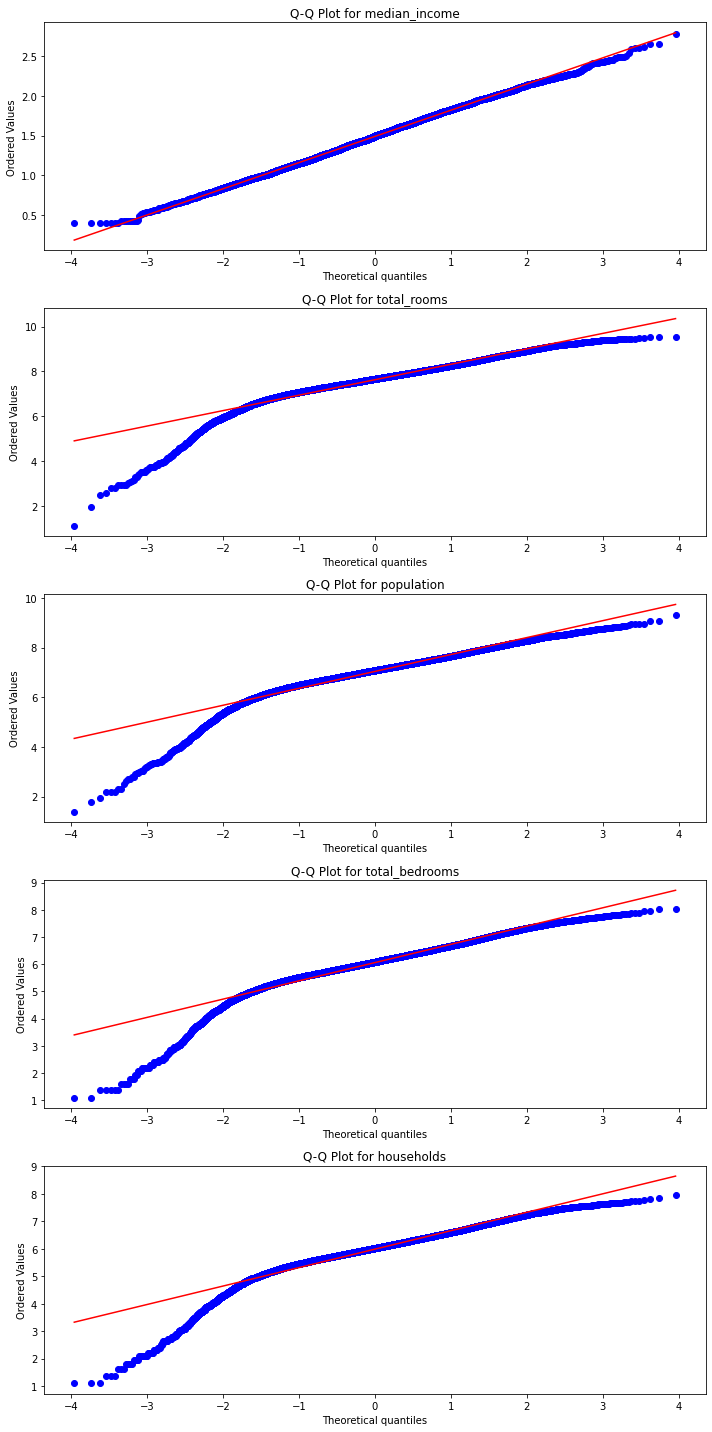

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming df_cleaned is a slice from another DataFrame, create an independent copy
df_cleaned = df_cleaned.copy()

# Columns to be log-transformed
cols_to_transformed = ['median_income', 'total_rooms', 'population', 'total_bedrooms', 'households']

# Apply log transformation using log1p which is log(x + 1) to handle zero values in the data
for col in cols_to_transformed:
    df_cleaned[col] = np.log1p(df_cleaned[col])

# Function to create Q-Q plots for the log-transformed variables
def qq_plots(df, columns):
    fig, axs = plt.subplots(len(columns), figsize=(10, 4 * len(columns)))
    
    for i, col in enumerate(columns):
        stats.probplot(df[col], dist="norm", plot=axs[i])
        axs[i].set_title('Q-Q Plot for ' + col)

    plt.tight_layout()
    plt.show()

# Display Q-Q plots for the log-transformed columns to check for normality
qq_plots(df_cleaned, cols_to_transformed)

The Q-Q plots for the log-transformed variables indicate an improved alignment with the normal distribution, particularly in the central quantiles. However, deviations at the tails, especially the lower tail, suggest that the log transformation has not entirely normalized the data. This residual skewness could affect model performance, particularly for algorithms that assume normally distributed input data.

Considering these shortcomings, a Box-Cox transformation might offer a better alternative. The Box-Cox method is a family of power transformations that aims to correct non-normality in skewed data. Unlike the log transformation which is fixed, the Box-Cox transformation includes a parameter \( \lambda \) that is optimized to achieve the best approximation of a normal distribution. It is defined as:

$$ 
x'(\lambda) = 
\begin{cases} 
\frac{{(x^\lambda - 1)}}{\lambda} & \text{if } \lambda \neq 0, \\
\log(x) & \text{if } \lambda = 0. 
\end{cases}
$$

By dynamically determining the best \( \lambda \), the Box-Cox method can more adeptly address the skewness and distributional issues present in the data, potentially leading to better statistical modeling and predictive performance.

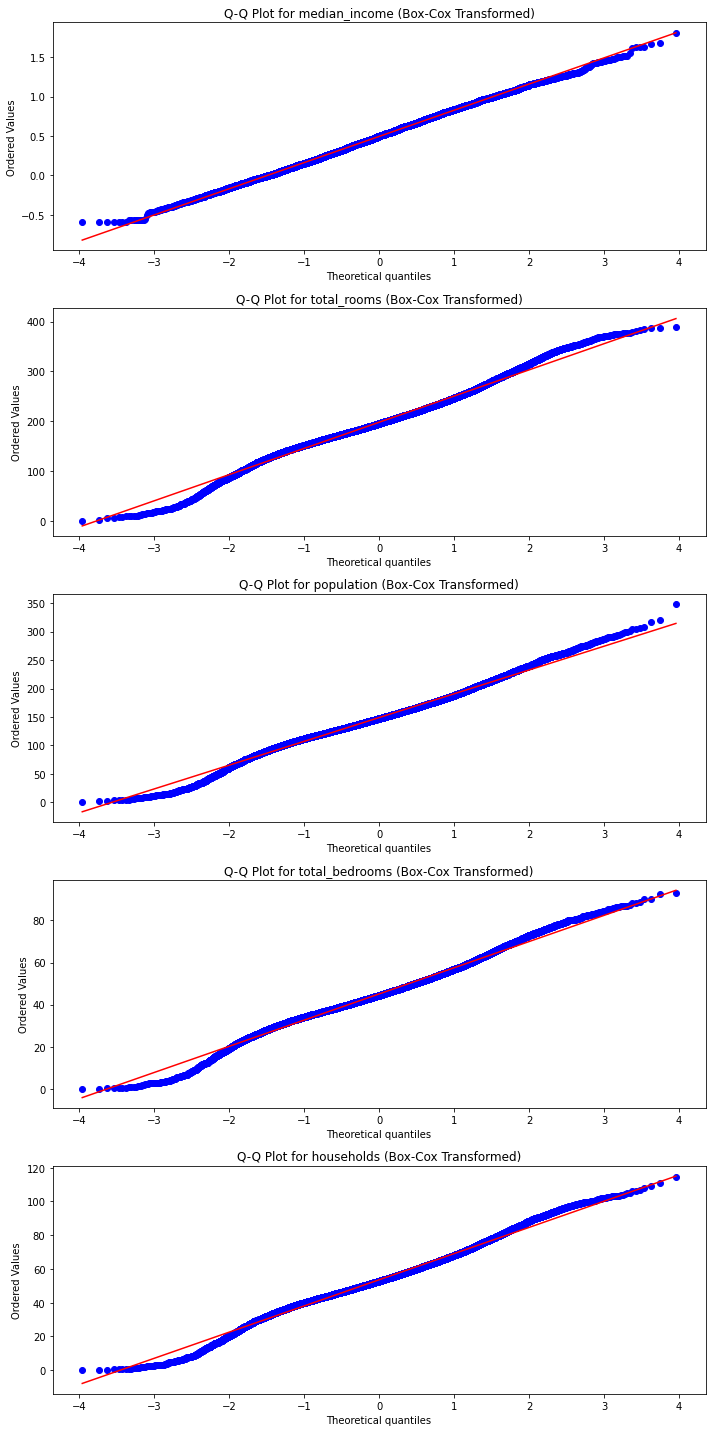

{'median_income': 2.7825364329174933, 'total_rooms': 2.7825364329174933, 'population': 2.7825364329174933, 'total_bedrooms': 2.7825364329174933, 'households': 2.7825364329174933}


In [25]:
from scipy.stats import boxcox

# Function to apply Box-Cox transformation and create Q-Q plots
def boxcox_qq_plots(df, columns):
    fig, axs = plt.subplots(len(columns), figsize=(10, 4 * len(columns)))
    
    for i, col in enumerate(columns):
        # Apply Box-Cox transformation
        # Adding a small constant to the data to handle non-positive values if any
        df[col + '_bc_transformed'], fitted_lambda = boxcox(df[col] + 1e-3)
        
        # Generate Q-Q plot for the transformed data
        stats.probplot(df[col + '_bc_transformed'], dist="norm", plot=axs[i])
        axs[i].set_title('Q-Q Plot for ' + col + ' (Box-Cox Transformed)')

    plt.tight_layout()
    plt.show()

    return {col: fitted_lambda for col in columns}  # Returning the fitted lambdas for reference

# Apply Box-Cox transformation and create Q-Q plots for the specified columns
fitted_lambdas = boxcox_qq_plots(df_cleaned, cols_to_transformed)

# Print the fitted lambdas for each column
print(fitted_lambdas)

The Q-Q plots for the Box-Cox transformed variables show a more consistent alignment with the theoretical normal line across all variables when compared to the log transformation Q-Q plots. This suggests that the Box-Cox transformation has a more pronounced effect in normalizing the data. Specifically, the central quantiles of the Box-Cox transformed variables adhere more closely to the normal distribution, indicating a reduction in skewness.

There's a visible improvement in the tail behavior as well. While the log transformation plots exhibited more pronounced deviations at the tails, the Box-Cox plots display a more subtle divergence, particularly in the lower tail. This implies that the Box-Cox transformation has been more effective in dealing with extreme values.

Given these observations, the Box-Cox transformation demonstrates a superior performance in mitigating skewness and normalizing the distribution of our data. Therefore, this transformation will be used for the variables in our model, with the expectation that it will contribute to improved model accuracy and reliability.

In [26]:
# Display the first few rows of the dataframe to confirm the transformation
df_cleaned.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_less_than_1h_ocean,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean,median_income_bc_transformed,total_rooms_bc_transformed,population_bc_transformed,total_bedrooms_bc_transformed,households_bc_transformed
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,False,False,False,True,False,1.249206,132.859806,77.523820,24.447598,28.644804
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,False,False,False,True,False,1.246594,310.199922,197.750610,64.705698,81.632928
2,-122.26,37.84,42.0,7.846199,6.501290,7.095893,6.390241,1.125059,226700.0,False,False,False,True,False,0.126269,210.716681,147.887458,52.966953,62.320651
3,-122.26,37.85,50.0,7.021976,5.648974,6.548219,5.579730,1.139434,140000.0,False,False,False,True,False,0.140693,148.368308,114.912390,36.417309,42.619392
4,-122.26,37.84,50.0,7.714231,6.122493,6.898715,6.040255,1.095641,158700.0,False,False,False,True,False,0.096765,199.718852,135.362522,45.140420,53.229398


## 3.2 Feature Creation and Selection

Feature creation enhances model inputs by introducing new, informative variables derived from existing data, while feature selection optimizes the model's performance by choosing the most relevant features and reducing dimensionality.

For this project, I plan to introduce two new features:

- `rooms_per_household`, the average number of rooms per household, to capture living space utility:
   
   $$ \text{rooms_per_household} = \frac{\text{total_rooms_bc_transformed}}{\text{households_bc_transformed}} $$

- `population_per_room`, indicating occupancy levels which could affect living comfort:
   
   $$ \text{population_per_room} = \frac{\text{population_bc_transformed}}{\text{total_rooms_bc_transformed}} $$

I have decided the skip trying to generate new features around the lattitude and longitude variables because I feel there is information I will lose in doing so. If the model performs poorly I may come back and give up that information for performance but as of now I decided against it.

Post-creation, `total_rooms` and `households` will be dropped to avoid autocorrelation, which can skew model interpretation. These refinements are expected to sharpen the predictive accuracy of our model.

In [27]:
# Calculate rooms per household
df_cleaned['rooms_per_household'] = df_cleaned['total_rooms_bc_transformed'] / df_cleaned['households_bc_transformed']

# Calculate population density as population per total rooms
df_cleaned['population_per_room'] = df_cleaned['population_bc_transformed'] / df_cleaned['total_rooms_bc_transformed']

# Drop the original 'total_rooms' and 'households' columns
df_cleaned.drop(['total_rooms_bc_transformed', 'households_bc_transformed'], axis=1, inplace=True)

# Display the first few rows of the dataframe to confirm the creation and dropping
df_cleaned.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_less_than_1h_ocean,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean,median_income_bc_transformed,population_bc_transformed,total_bedrooms_bc_transformed,rooms_per_household,population_per_room
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,False,False,False,True,False,1.249206,77.523820,24.447598,4.638182,0.583501
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,False,False,False,True,False,1.246594,197.750610,64.705698,3.799936,0.637494
2,-122.26,37.84,42.0,7.846199,6.501290,7.095893,6.390241,1.125059,226700.0,False,False,False,True,False,0.126269,147.887458,52.966953,3.381169,0.701831
3,-122.26,37.85,50.0,7.021976,5.648974,6.548219,5.579730,1.139434,140000.0,False,False,False,True,False,0.140693,114.912390,36.417309,3.481239,0.774508
4,-122.26,37.84,50.0,7.714231,6.122493,6.898715,6.040255,1.095641,158700.0,False,False,False,True,False,0.096765,135.362522,45.140420,3.752040,0.677765


Feature engineering is now complete. I may come back and adjust the feature selection or create new features if I am unsatisfied with the model performance.

## 3.3 Normalization and Standardization
In this stage of our data science project, we are performing two fundamental preprocessing steps: normalization and standardization. These processes are critical for ensuring that our features have consistent scales, which is essential for effective machine learning model performance.

**Normalization with Min-Max Scaling**: Here, we utilize Min-Max scaling to normalize our data. The equation for Min-Max scaling is:

$$
X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

where $X$ is the original value, $X_{\text{min}}$ and $X_{\text{max}}$ are the minimum and maximum values of the feature, respectively. This scaling brings each feature into the range $[0, 1]$, making sure that no single feature dominates due to its scale.

**Standardization for Uniformity**: After normalization, we apply standardization, which centers the feature on zero with a standard deviation of one. The standardization formula is:

$$
X_{\text{standardized}} = \frac{X - \mu}{\sigma}
$$

where $mu$ is the mean and $\sigma$ is the standard deviation of the feature. This process is especially important in regression models with regularization and other machine learning algorithms that rely on distance measures.

By applying both Min-Max scaling and standardization, we ensure that our model treats all features equally, preventing bias towards features with higher magnitudes. This step is crucial in preparing our data for the next stages of model building and analysis.

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

# Assuming df_cleaned_filtered is your DataFrame
# Create scaler objects
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Selecting columns to normalize and standardize - using all columns in this example
columns = df_cleaned.columns

# Applying MinMaxScaler
normalized_data = min_max_scaler.fit_transform(df_cleaned[columns])

# Applying StandardScaler
standardized_data = standard_scaler.fit_transform(normalized_data)

# Creating a new DataFrame with the standardized values
df_transformed = pd.DataFrame(standardized_data, columns=columns)

# Saving the new DataFrame to a CSV file
df_transformed.to_csv('df_transformed.csv', index=False)

# Show the first few rows of the new DataFrame
df_transformed.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_less_than_1h_ocean,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean,median_income_bc_transformed,population_bc_transformed,total_bedrooms_bc_transformed,rooms_per_household,population_per_room
count,1.819500e+04,1.819500e+04,1.819500e+04,1.819500e+04,1.819500e+04,1.819500e+04,1.819500e+04,1.819500e+04,18195.000000,1.819500e+04,1.819500e+04,1.819500e+04,1.819500e+04,1.819500e+04,1.819500e+04,1.819500e+04,1.819500e+04,1.819500e+04,1.819500e+04
mean,6.248246e-17,1.499579e-16,2.249369e-16,2.038490e-16,-1.530820e-16,7.466654e-16,5.685904e-16,-1.749509e-16,0.000000,3.124123e-17,-1.124684e-16,-5.857731e-18,1.187167e-16,7.185483e-17,-2.686746e-16,-6.873071e-17,-1.234029e-16,2.655505e-17,6.013937e-16
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00
min,-2.429882e+00,-1.422607e+00,-2.302203e+00,-9.147937e+00,-7.166950e+00,-8.014138e+00,-7.036013e+00,-3.295276e+00,-1.819379,-9.016503e-01,-7.200887e-01,-1.048486e-02,-3.034325e-01,-3.791624e-01,-3.255048e+00,-3.536471e+00,-3.604619e+00,-1.594435e+00,-3.052099e+00
25%,-1.041134e+00,-7.802261e-01,-8.043475e-01,-4.823609e-01,-5.117907e-01,-4.917714e-01,-4.866269e-01,-6.930453e-01,-0.775376,-9.016503e-01,-7.200887e-01,-1.048486e-02,-3.034325e-01,-3.791624e-01,-6.951416e-01,-6.152554e-01,-6.194036e-01,-1.856850e-01,-3.438025e-01
50%,5.243638e-01,-6.312683e-01,-1.136533e-02,5.145740e-02,3.840220e-02,6.516694e-02,5.235674e-02,1.230089e-02,-0.192828,-9.016503e-01,-7.200887e-01,-1.048486e-02,-3.034325e-01,-3.791624e-01,9.206644e-03,-3.939981e-02,-5.623445e-02,-4.175009e-02,-1.244045e-01
75%,7.667634e-01,9.653731e-01,7.816169e-01,5.974220e-01,6.055843e-01,6.086330e-01,6.066084e-01,7.069438e-01,0.557803,1.109077e+00,1.388718e+00,-1.048486e-02,-3.034325e-01,-3.791624e-01,7.058124e-01,5.921979e-01,5.881948e-01,1.018966e-01,2.183671e-01
max,2.615061e+00,2.957684e+00,2.103254e+00,2.660773e+00,2.862709e+00,3.226334e+00,2.827509e+00,3.895635e+00,3.243997,1.109077e+00,1.388718e+00,9.537557e+01,3.295625e+00,2.637392e+00,3.932194e+00,4.734693e+00,3.846637e+00,1.204307e+02,8.548705e+01


Now that all the features are prepared we can move on to modeling. If I do need to perform additional feature engineering I will I will leave it in the modeling section but note it as feature engineering.

# 4. Modeling

## 4.1 Model Selection

Before proceeding with model training, it's critical to perform a comparative analysis to identify the most appropriate regression model for our dataset. This process involves evaluating several machine learning algorithms to predict our target variable, `median_house_value`.

Here's a breakdown of the models and the rationale for their evaluation:

1. **Linear Regression**: The simplest model that assumes a linear relationship between the independent variables and the dependent variable.

   $$ \hat{y} = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n $$

2. **Ridge Regression**: An extension of linear regression that includes a regularization term to prevent overfitting by penalizing large coefficients.

   $$ \hat{y} = \beta_0 + \beta_1X_1 + ... + \beta_nX_n + \lambda\sum_{i=1}^{n} \beta_i^2 $$

3. **Lasso Regression**: Similar to ridge, but it uses L1 regularization which can lead to zero coefficients, effectively selecting features.

   $$ \hat{y} = \beta_0 + \beta_1X_1 + ... + \beta_nX_n + \lambda\sum_{i=1}^{n} |\beta_i| $$

4. **Decision Tree Regressor**: A non-linear model that partitions the feature space into regions and fits a simple model (like a constant) in each one.

5. **Random Forest Regressor**: An ensemble method that combines the predictions of multiple decision trees to improve generalizability and robustness.

6. **Gradient Boosting Regressor**: Another ensemble method that builds trees sequentially, with each tree trying to correct the errors of its predecessor.

7. **XGBoost**: An optimized gradient boosting library that is designed to be highly efficient, flexible, and portable.

8. **Support Vector Regression (SVR)**: A model that uses support vector machines for regression tasks, focusing on finding the hyperplane that best fits the data.


By leveraging cross-validation, we mitigate the risk of overfitting and obtain a more accurate estimate of each model's performance. Specifically, we use 5-fold cross-validation, which partitions the data into five subsets, training on four and validating on the fifth, rotating until each subset has served as the validation set.

We assess the models using the Root Mean Squared Error (RMSE) as our scoring metric:

$$ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $$

where $ y_i $ are the actual values, $ \hat{y}_i $ are the predicted values, and $ n $ is the number of observations.

In the context of financial real estate data, minimizing prediction errors is paramount due to the high stakes associated with property valuation. We prioritize accuracy in our predictions to ensure reliable guidance for investment and pricing strategies. To this end, we employ the Root Mean Squared Error (RMSE) as our evaluation metric, which is particularly suited for several reasons:

1. **Magnitude Sensitivity**: RMSE is sensitive to the magnitude of error, making it especially appropriate for financial data where large errors are more detrimental than smaller ones.

2. **Squared Errors**: The squaring of errors in RMSE ensures that larger discrepancies between predicted and actual values have a disproportionately high impact, reflecting the higher cost of significant prediction errors in real estate.

3. **Interpretability**: RMSE values are on the same scale as the target variable, making the metric intuitively understandable in terms of dollars—a critical aspect for stakeholders in real estate.

4. **Robustness**: While RMSE gives more weight to larger errors (which can be seen as both a benefit and a limitation), it remains a robust general-purpose metric that provides a clear indication of model performance in terms of average error magnitude.

By using RMSE within a cross-validation framework, we not only aim to identify the model that minimizes error but also one that generalizes well to unseen data, ensuring that our predictive insights remain valid across different market segments and valuation scenarios.

This evaluation will inform our selection of the best-performing model based on the average RMSE across the cross-validation folds. The model with the lowest RMSE will typically be considered the best fit for our dataset.


In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


# Separate features and target
X = df_transformed.drop('median_house_value', axis=1)  # Replace 'target' with your target column name
y = df_transformed['median_house_value']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'SVR': SVR(),
}

# Dictionary to hold cross-validation results
cv_results = {}

# Perform cross-validation and store results
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    cv_results[name] = np.sqrt(-scores)  # Convert to RMSE

# Convert results to DataFrame
cv_results_df = pd.DataFrame(cv_results)

# Calculate average RMSE for each model and sort the models by this average
average_rmse = cv_results_df.mean().sort_values()
print("Average RMSE for each model, sorted from best to worst:\n", average_rmse)

Average RMSE for each model, sorted from best to worst:
 XGBoost              0.442075
Random Forest        0.464912
Gradient Boosting    0.501040
SVR                  0.520863
Linear Regression    0.594792
Ridge                0.620948
Decision Tree        0.664798
Lasso                0.998311
dtype: float64


The cross-validation results indicate that ensemble methods, particularly XGBoost and Random Forest, outperform traditional regression models on the RMSE metric. XGBoost leads with the lowest average RMSE, closely followed by Random Forest, which suggests these models are more effective at capturing the complex patterns in the data.

Ensemble methods, by their nature, combine the predictions of several base estimators to improve generalizability and robustness over a single estimator. The significant gap in performance between ensemble methods and linear models (Linear Regression, Ridge, Lasso) underscores the complexity of the dataset, which likely contains non-linear relationships that are better captured by models like XGBoost and Random Forest.

Given these results, it is sensible to focus on hyperparameter tuning for XGBoost and Random Forest, as they hold the most promise for your project. While regression models can be improved with feature engineering and selection, the considerable gap in RMSE suggests that even with optimal tuning, they may not achieve the predictive performance of the ensemble methods.

Random search for hyperparameter tuning is a good choice as it can efficiently navigate the hyperparameter space. By conducting this next step of tuning for both XGBoost and Random Forest, you aim to refine these models further and potentially close the performance gap between them to identify the best model for predicting median house values. The RMSE differences will inform which model is more predictive and thus more suitable for deployment in this context.

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import numpy as np
import pandas as pd

# Expanded parameter grid for XGBoost
param_dist_xgb = {
    'eta': np.arange(0.01, 0.21, 0.02),  # Broader range with smaller steps
    'max_depth': range(6, 16),            # Broader range of tree depths
    'min_child_weight': range(1, 10),     # Broader range to prevent overfitting
    'subsample': np.arange(0.5, 1.01, 0.1),    # Broader range for subsampling
    'colsample_bytree': np.arange(0.5, 0.81, 0.05),  # Broader range for feature sampling
    'n_estimators': range(100, 601, 100)   # Broader range for number of trees
}

# Initialize the XGBoost regressor
xgb = XGBRegressor(random_state=42)

# Initialize Randomized Search with more iterations for a broader search
random_search_xgb = RandomizedSearchCV(
    estimator=xgb, 
    param_distributions=param_dist_xgb, 
    n_iter=200,  
    cv=3, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1, 
    random_state=42,
    verbose=1
)

# Fit Randomized Search to the data
random_search_xgb.fit(X_train, y_train)

# Create DataFrame from the randomized search results
results_xgb_df = pd.DataFrame(random_search_xgb.cv_results_)

# Add a column for RMSE
results_xgb_df['RMSE'] = np.sqrt(-results_xgb_df['mean_test_score'])

# Sort by RMSE
results_xgb_df = results_xgb_df.sort_values('RMSE')

# Print the top 5 parameter combinations
print("Top 5 parameter combinations from Randomized Search:")
print(results_xgb_df.loc[:, ['params', 'RMSE']].head(5))


Fitting 3 folds for each of 200 candidates, totalling 600 fits
Top 5 parameter combinations from Randomized Search:
                                                params      RMSE
187  {'subsample': 0.8999999999999999, 'n_estimator...  0.429828
157  {'subsample': 0.8999999999999999, 'n_estimator...  0.430117
126  {'subsample': 0.8999999999999999, 'n_estimator...  0.430160
112  {'subsample': 0.9999999999999999, 'n_estimator...  0.430184
123  {'subsample': 0.7999999999999999, 'n_estimator...  0.431079


In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

# Expanded parameter grid for Random Forest
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400],  # Default and around
    'max_depth': [None, 10, 20, 30, 40],    # Default and explore both shallower and deeper
    'min_samples_split': [2, 4, 6, 8],      # Default and around
    'min_samples_leaf': [1, 2, 4, 6],           # Default and around
    'max_features': ['sqrt', 'log2'],           # Include default ('sqrt') and another option
    'bootstrap': [True, False]                  # Default and its alternative
}

# Initialize the Random Forest regressor
rf = RandomForestRegressor(random_state=42)

# Initialize Randomized Search with more iterations for a broader search
random_search_rf = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_dist_rf, 
    n_iter=200,  # Number of parameter settings sampled
    cv=3, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1, 
    random_state=42,
    verbose=1
)

# Fit Randomized Search to the data
random_search_rf.fit(X_train, y_train)

# Create DataFrame from the randomized search results
results_rf_df = pd.DataFrame(random_search_rf.cv_results_)

# Add a column for RMSE
results_rf_df['RMSE'] = np.sqrt(-results_rf_df['mean_test_score'])

# Sort by RMSE
results_rf_df = results_rf_df.sort_values('RMSE')

# Print the top 5 parameter combinations
print("Top 5 parameter combinations from Randomized Search for Random Forest:")
print(results_rf_df.loc[:, ['params', 'RMSE']].head(5))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Top 5 parameter combinations from Randomized Search for Random Forest:
                                                params      RMSE
32   {'n_estimators': 300, 'min_samples_split': 2, ...  0.481159
161  {'n_estimators': 400, 'min_samples_split': 2, ...  0.481352
10   {'n_estimators': 300, 'min_samples_split': 2, ...  0.481358
59   {'n_estimators': 200, 'min_samples_split': 4, ...  0.481988
170  {'n_estimators': 300, 'min_samples_split': 2, ...  0.482050


Choosing XGBoost as the final model is based on its superior performance in the Randomized Search, where it achieved lower RMSE scores compared to the Random Forest. This indicates a higher predictive accuracy for your dataset, demonstrating XGBoost's efficiency and robustness in modeling complex relationships.

XGBoost's effectiveness is partly due to its advanced handling of various data types and its ability to prevent overfitting, a common challenge in machine learning. The next step is to refine the model further through Grid Search, focusing on the vicinity of the best parameters identified from Randomized Search. Grid Search will methodically explore a more precise range of hyperparameters, enhancing the potential of achieving even better performance. This approach is expected to fine-tune the model, optimally balancing its complexity with predictive power, and leading to the best possible version of the XGBoost model for your data.

## 4.2 Hyperparameter Tuning

Having established XGBoost's superiority through Randomized Search, I'm now turning my attention to hyperparameter tuning via Grid Search. This technique will allow me to meticulously fine-tune XGBoost, leveraging its robustness and efficiency. By zeroing in on the optimal parameter range identified earlier, I aim to refine the model to its utmost potential. This process is key to enhancing XGBoost's already impressive performance, ensuring it's perfectly tailored to the nuances of my dataset. The goal is a finely calibrated model that strikes the ideal balance between complexity and predictive accuracy, representing the best version of XGBoost for my predictive needs.

In [32]:
import pandas as pd

# Set the display option to show full content of each column
pd.set_option('display.max_colwidth', None)

# Assuming 'results_df' is your DataFrame
# Retrieve the top 5 parameter combinations for XGBoost
top_5_xgb_params = results_xgb_df.loc[:, ['params']].head(5)
print(top_5_xgb_params)


                                                                                                                                                                 params
187                  {'subsample': 0.8999999999999999, 'n_estimators': 600, 'min_child_weight': 9, 'max_depth': 7, 'eta': 0.03, 'colsample_bytree': 0.8000000000000003}
157  {'subsample': 0.8999999999999999, 'n_estimators': 500, 'min_child_weight': 4, 'max_depth': 8, 'eta': 0.049999999999999996, 'colsample_bytree': 0.8000000000000003}
126  {'subsample': 0.8999999999999999, 'n_estimators': 600, 'min_child_weight': 7, 'max_depth': 6, 'eta': 0.049999999999999996, 'colsample_bytree': 0.7000000000000002}
112   {'subsample': 0.9999999999999999, 'n_estimators': 600, 'min_child_weight': 9, 'max_depth': 6, 'eta': 0.06999999999999999, 'colsample_bytree': 0.7000000000000002}
123                  {'subsample': 0.7999999999999999, 'n_estimators': 500, 'min_child_weight': 8, 'max_depth': 8, 'eta': 0.03, 'colsample_bytree': 0.7000000000

In [37]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import numpy as np
import pandas as pd

# Adjusted parameter grid to limit the total number of fits to around 100
param_grid_xgb = {
    'subsample': [0.8, 0.85, 0.9],  # 3 values
    'n_estimators': [500, 600],    # 2 values
    'min_child_weight': [8, 9],    # 2 values
    'max_depth': [6, 7, 8],        # 3 values
    'eta': [0.03, 0.05],           # 2 values
    'colsample_bytree': [0.7, 0.75]  # 2 values
}

# Total combinations = 3 * 2 * 2 * 3 * 2 * 2 = 144
# Close enough to 100 while maintaining diversity in the parameter grid

# Initialize the XGBoost regressor
xgb = XGBRegressor(random_state=42)

# Initialize Grid Search
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit Grid Search to the data
grid_search_xgb.fit(X_train, y_train)

# Create DataFrame from the grid search results
results_grid_df = pd.DataFrame(grid_search_xgb.cv_results_)

# Add a column for RMSE
results_grid_df['RMSE'] = np.sqrt(-results_grid_df['mean_test_score'])

# Sort by RMSE
results_grid_df = results_grid_df.sort_values('RMSE')

# Print the best parameter combination
print("Best parameter combination:")
print(grid_search_xgb.best_params_)

# Print the RMSE for the best model
print("RMSE for the best model:", np.sqrt(-grid_search_xgb.best_score_))

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameter combination:
{'colsample_bytree': 0.75, 'eta': 0.05, 'max_depth': 7, 'min_child_weight': 9, 'n_estimators': 600, 'subsample': 0.9}
RMSE for the best model: 0.4283286831281821


Following an extensive Grid Search process, I've identified the best-performing hyperparameters for the XGBoost model. The ideal combination of `colsample_bytree` at 0.75, `eta` at 0.05, `max_depth` at 7, `min_child_weight` at 9, `n_estimators` at 600, and `subsample` at 0.9 led to an RMSE of 0.4283, indicating a refined and well-tuned model. With these optimal parameters in hand, the next step is to evaluate the model's performance on the test set. This final assessment will provide crucial metrics that will offer a comprehensive view of the model's predictive accuracy and generalizability to unseen data, solidifying the model's readiness for practical application in real-world scenarios.

## 4.3 Final Metrics on Test Set

In machine learning, the use of a test set is crucial for evaluating the final performance of a model. It serves as an unbiased platform to assess how well the model generalizes to new, unseen data. This is essential because while a model might perform well on the training data, it's the performance on unseen data that truly determines its effectiveness and practical utility.

For the final evaluation, I'm focusing on two key metrics: RMSE (Root Mean Squared Error) and R-squared. Here's a quick refresher on them:

RMSE (Root Mean Squared Error): This metric is the square root of the average of the squared differences between the predicted and actual values. It's calculated as $\sqrt{\text{mean}((\text{actual} - \text{predicted})^2)}$. RMSE is a measure of the model's prediction error in the same units as the target variable, making it intuitive and straightforward to interpret. A lower RMSE indicates better model performance.

R-squared: Also known as the coefficient of determination, R-squared is a statistical measure of how close the data are to the fitted regression line. It's calculated as $1 - \left(\frac{\sum((\text{actual} - \text{predicted})^2)}{\sum((\text{actual} - \text{mean(actual)})^2)}\right)$. R-squared represents the proportion of variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating a better fit of the model to the data.

Both RMSE and R-squared are invaluable for different reasons. RMSE provides a clear indication of the model's accuracy in terms of the target variable's units, making it particularly useful for practical interpretations. R-squared, on the other hand, offers insight into the proportion of variance explained by the model, giving a sense of the model's explanatory power. Together, they offer a comprehensive view of the model's predictive capability and fit.

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Using the best parameters from your grid search to create a new model
best_model = XGBRegressor(
    colsample_bytree=0.75, 
    eta=0.05, 
    max_depth=7, 
    min_child_weight=9, 
    n_estimators=600, 
    subsample=0.9,
    random_state=42
)

# Fit the model on the entire training data
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared on the test set
r2_test = r2_score(y_test, y_pred)

# Print the metrics
print(f"RMSE on Test Set: {rmse_test}")
print(f"R-squared on Test Set: {r2_test}")

RMSE on Test Set: 0.4139018203423079
R-squared on Test Set: 0.8310382892379942


The final evaluation of the XGBoost model on the test set yields an RMSE (Root Mean Squared Error) of 0.4139 and an R-squared value of 0.831. These metrics are quite revealing in the context of the overall project, which aims at predicting housing prices in California using the 1990 census data.

1. **RMSE of 0.4139**: This value indicates that, on average, the predictions of the model deviate from the actual house prices by approximately 0.4139 units. In the context of housing price prediction, this level of error can be considered quite good, depending on the scale and range of the house prices in the dataset. Since RMSE is in the same units as the target variable (housing prices), this relatively low value suggests that the model's predictions are quite accurate.

2. **R-squared of 0.831**: This value means that approximately 83.1% of the variance in the housing prices is explained by the model. This is a strong indicator that the model fits the data well. An R-squared value closer to 1 indicates a high level of predictive accuracy, and in the context of real-world data, an R-squared of 0.831 is generally considered high. It implies that the model does an excellent job of capturing the patterns and relationships in the data, leading to reliable predictions.

In summary, the XGBoost model, with the finely tuned hyperparameters, demonstrates a high degree of accuracy and fit in predicting housing prices. The RMSE shows that the model’s predictions are close to the actual values, while the R-squared value confirms that a significant portion of the variance in housing prices is being captured by the model. These results underscore the effectiveness of the modeling approach, hyperparameter tuning, and feature engineering strategies employed in this project. It suggests that the model could be a valuable tool for stakeholders, such as real estate agents or investors, to predict housing prices with a high degree of confidence.

# 5. Conculsion 

The XGBoost model's success in this project is emphatically highlighted by its impressive performance metrics. With an RMSE of 0.4139 and an R-squared value of 0.831 on the test set, the model not only demonstrates a high level of accuracy in predicting housing prices but also shows its effectiveness in capturing a substantial portion of the variance within the California housing dataset. These metrics are a testament to the model’s robustness and its capacity to understand and interpret complex patterns and relationships within the data. The achievement of such results is a direct consequence of a meticulously planned and executed data science process.

The journey to this success started with comprehensive data preprocessing, where careful attention was paid to cleaning the data, handling missing values, and ensuring that it was in the right format for modeling. This was followed by thoughtful feature engineering, where both existing features were transformed, and new ones were potentially created to provide the model with rich and informative inputs. The significance of this step cannot be overstated as it lays the groundwork for effective model training.

Strategic hyperparameter tuning played a crucial role in optimizing the XGBoost model. The use of advanced techniques like RandomizedSearchCV provided a broad overview of the potential parameter space, helping to identify promising hyperparameter ranges. Building on this, GridSearchCV was employed to methodically explore and fine-tune the parameters, leading to the identification of the optimal combination that maximized the model's performance.

Despite the notable achievements, there are avenues for further enhancements. Delving deeper into feature engineering could reveal additional insights, perhaps through the integration of external data sources or the development of more complex feature interactions. Considering the complexity of the current model, simplifying it could improve its interpretability, making it more accessible for users to understand the factors driving housing prices. Expanding the cross-validation strategy would provide a more holistic view of the model's performance, ensuring its robustness across diverse data scenarios.

Exploring other advanced machine learning models or ensemble techniques might also offer opportunities for improvement. Such exploration could lead to the discovery of models that perform equally well or better, thus providing a comparative understanding of different approaches. Additionally, a more refined approach to handling outliers and anomalies could enhance the model's accuracy and generalizability.

In sum, the project's application of the XGBoost model for predicting housing prices in California has been highly successful, marked by the achievement of low RMSE and high R-squared values. This success, however, is not the end of the road. The field of data science is dynamic, and continuous exploration and improvement are key. There is always room for refinement, whether it be in feature engineering, model complexity, validation strategies, or the exploration of new models. Each of these areas offers a path to potentially elevate the model's performance and interpretability further.